# Decision Tree Classification


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Importing the dataset

In [10]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(7)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0


## Splitting the dataset into the Training set and Test set

In [12]:
feature_cols = ['Age','EstimatedSalary']
X = df[feature_cols] # Features
y = df.Purchased # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280, 2) (120, 2) (280,) (120,)


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler  # Standarization
# from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
# scale = MinMaxScaler()
df[['Age','EstimatedSalary']]=scale.fit_transform(df[['Age','EstimatedSalary']])

## Training the Decision Tree Classification model on the Training set

In [14]:
#model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', random_state=40)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

## Predicting a new result

In [16]:
y_pred = model.predict(X_test)
#predict(): The trained model predicts the species for the test data (X_test).
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

## Predicting the Test set results

In [24]:
y_test = model.predict(X_train)

## Making the Confusion Matrix

In [18]:
accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, target_names='Purchased')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", accuracy)

[[70  7]
 [ 9 34]]
Accuracy: 0.8666666666666667


# Visualizing the Decision Tree:

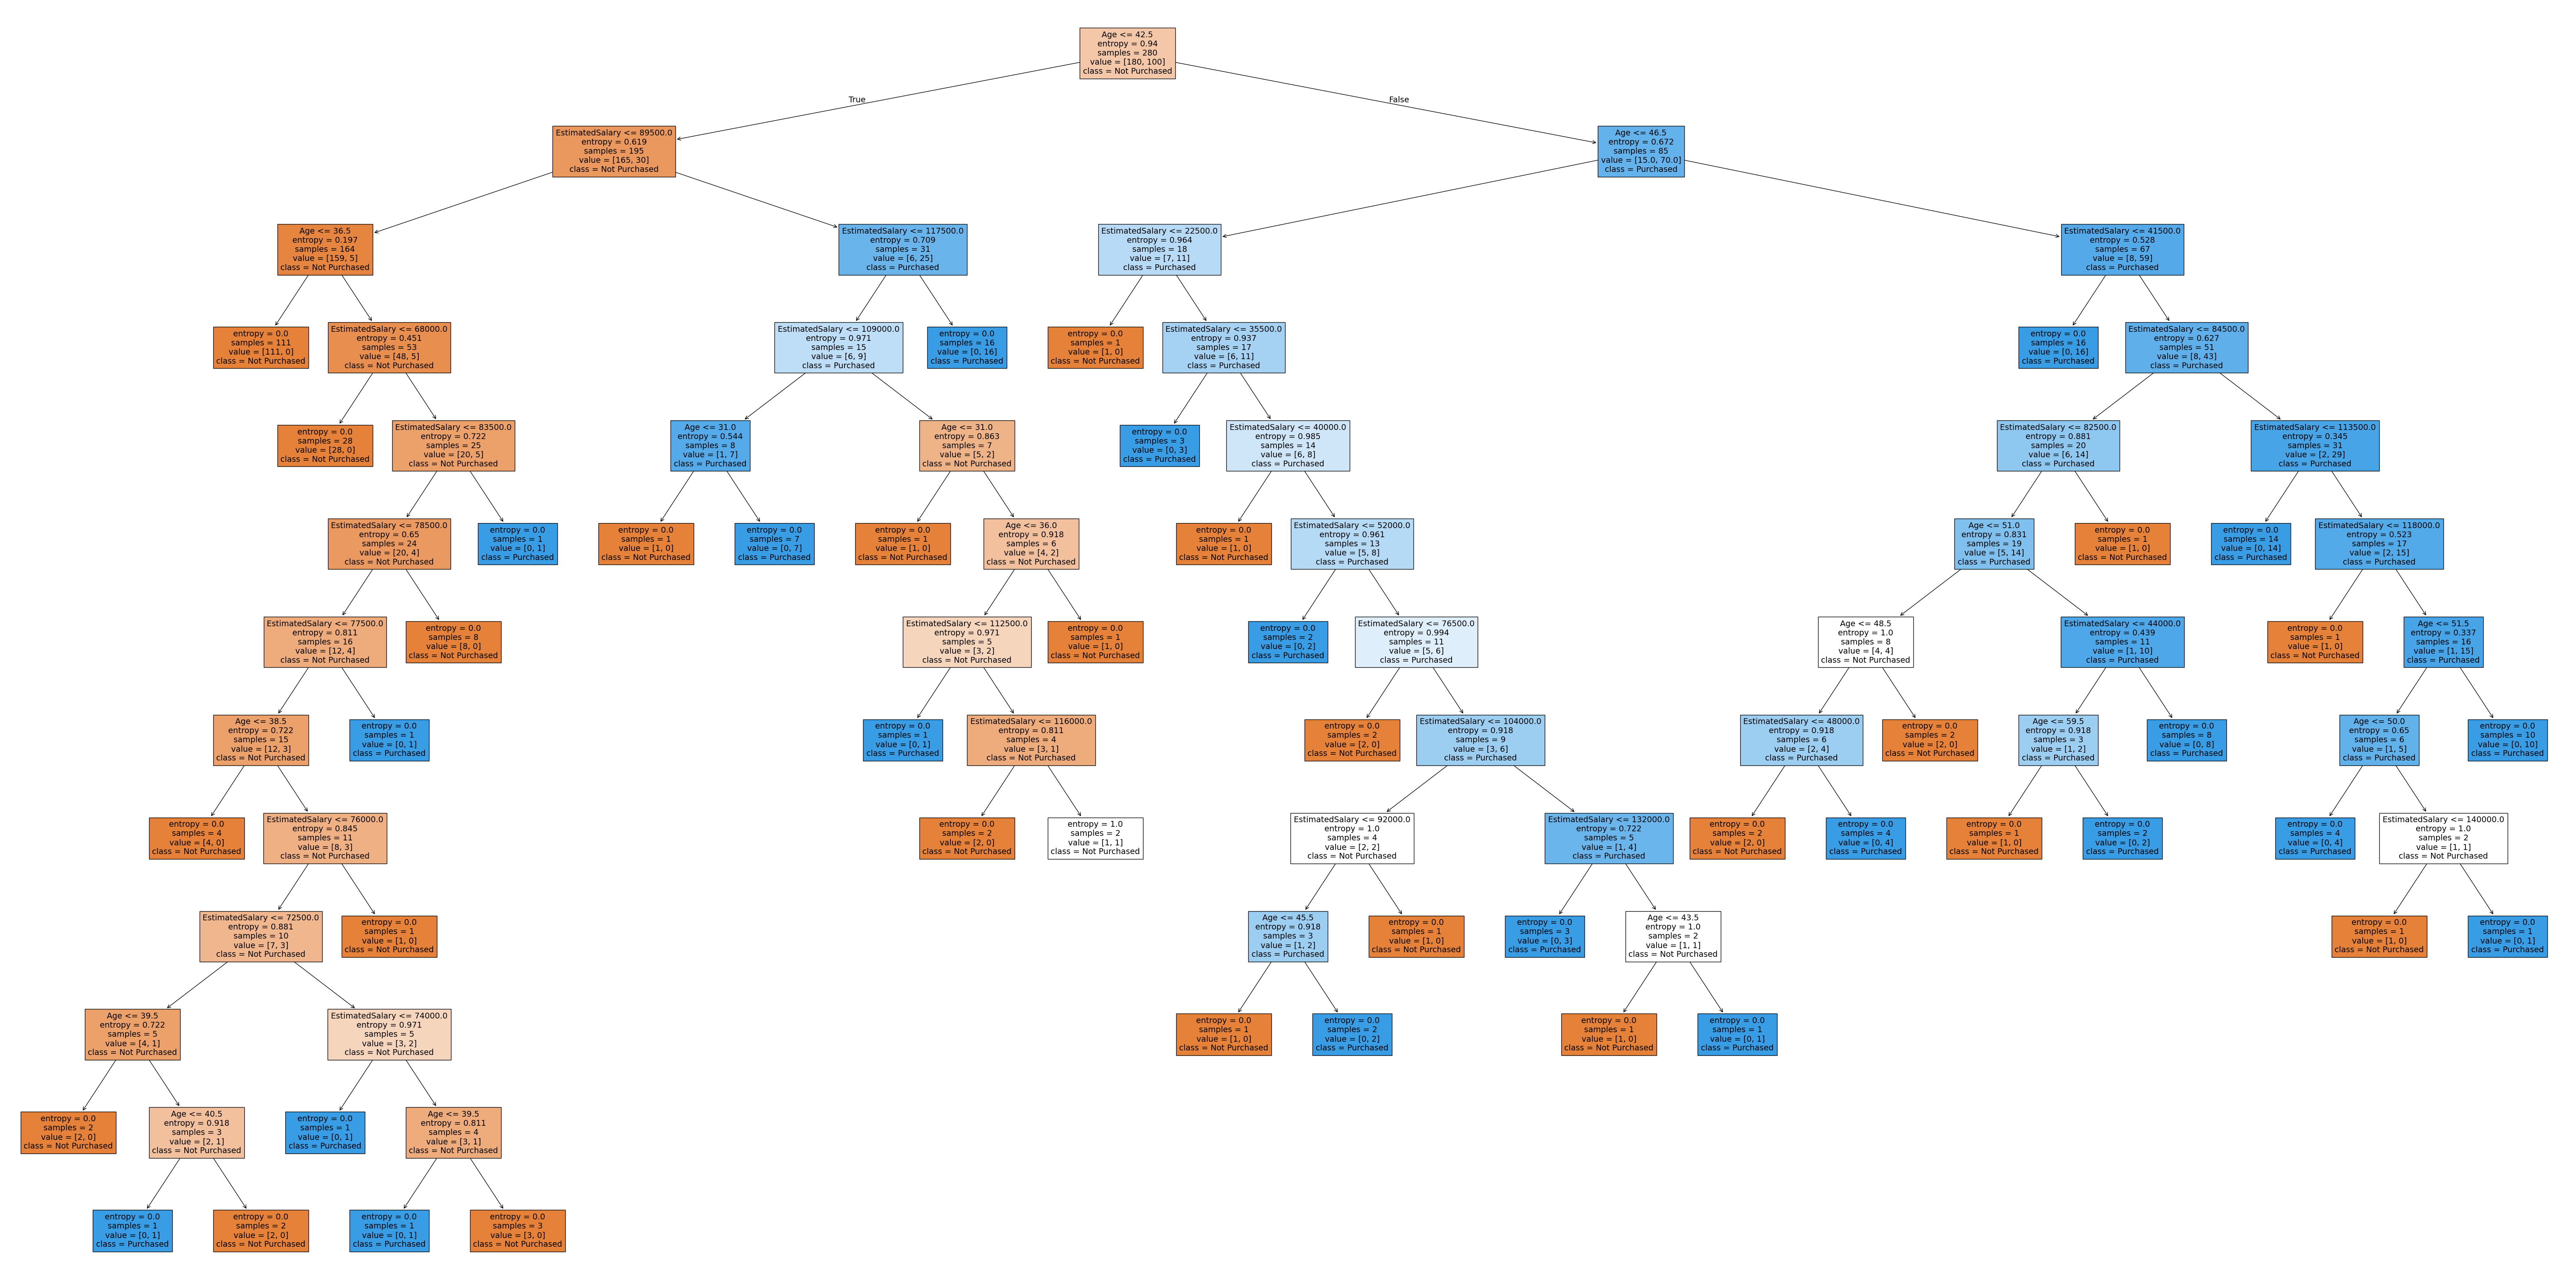

In [23]:
plt.figure(figsize=(80,40))
plot_tree(model, filled=True, feature_names=['Age','EstimatedSalary'], class_names=['Not Purchased','Purchased'])
plt.show()
#plot_tree(): Visualizes the Decision Tree structure. The filled=True parameter colors the nodes according to the majority class at each node.
#plt.show(): Displays the Decision Tree plot.